# Data Analysis on Advertising Data

The Dataset is from a Kaggle competition and the csv file has 4 main columns TV, Radio, Newspaper and Sales.
The features (X - Amount (tens of thousands of $) spent in a particular market) are the TV, Newspaper & Radio columns and the Sales column is the target (y - total Amount spent on the segment).

The challenge can be found here: https://www.kaggle.com/bumba5341/advertisingcsv.

This notebook is going to discuss a few supervised learning techniques and show visualizations at the end.

In [1]:
import pandas as pd
import os

data = pd.read_csv(os.path.join('data', 'Advertising.csv'), index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data.shape

(200, 4)

## Visualization
Now we will visualize the data. The data is visualized in the form of scatter plot where each of the feature is compared to the target variable, i.e. Sales.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Here is the scatter plot of the data.

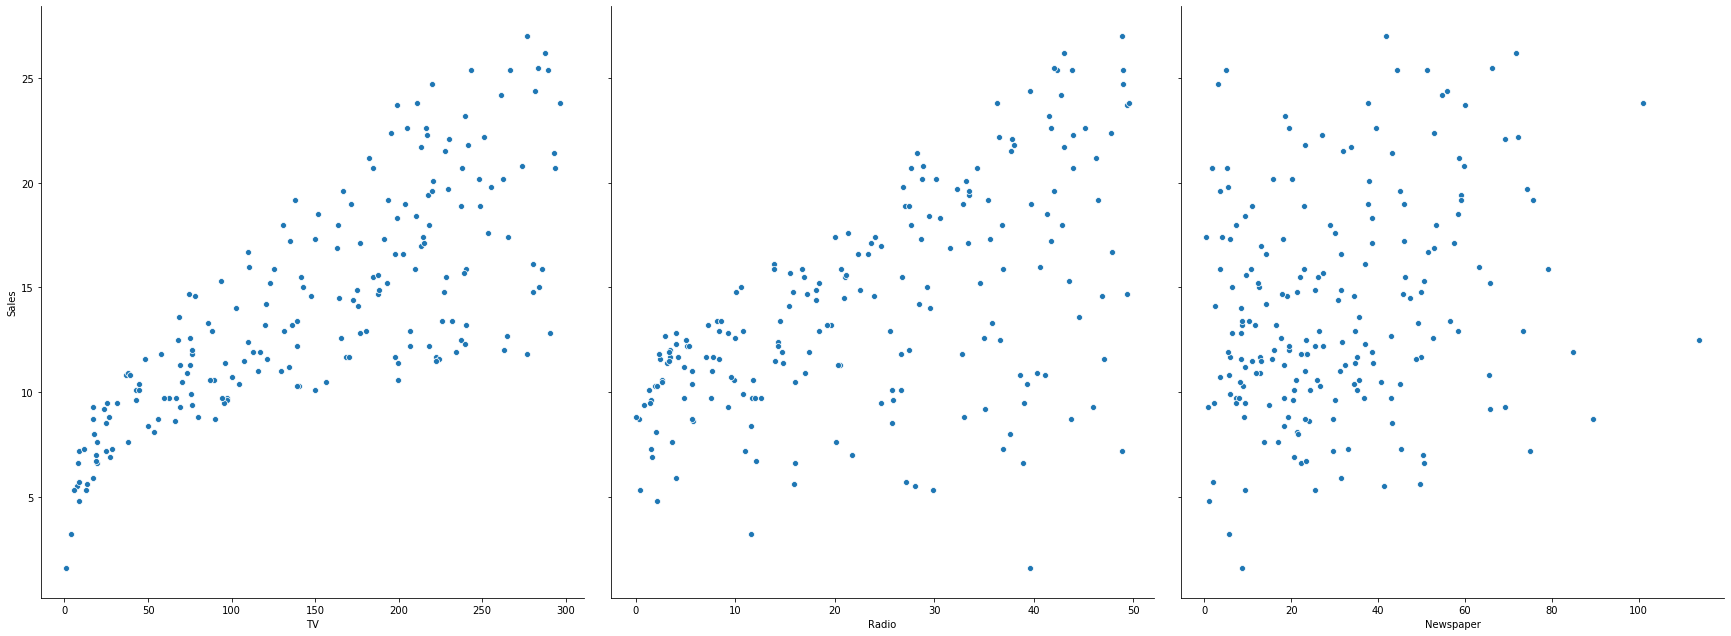

In [7]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=9, aspect=0.9)

The following plots line going through them which specify the perfect line to represent the whole data.

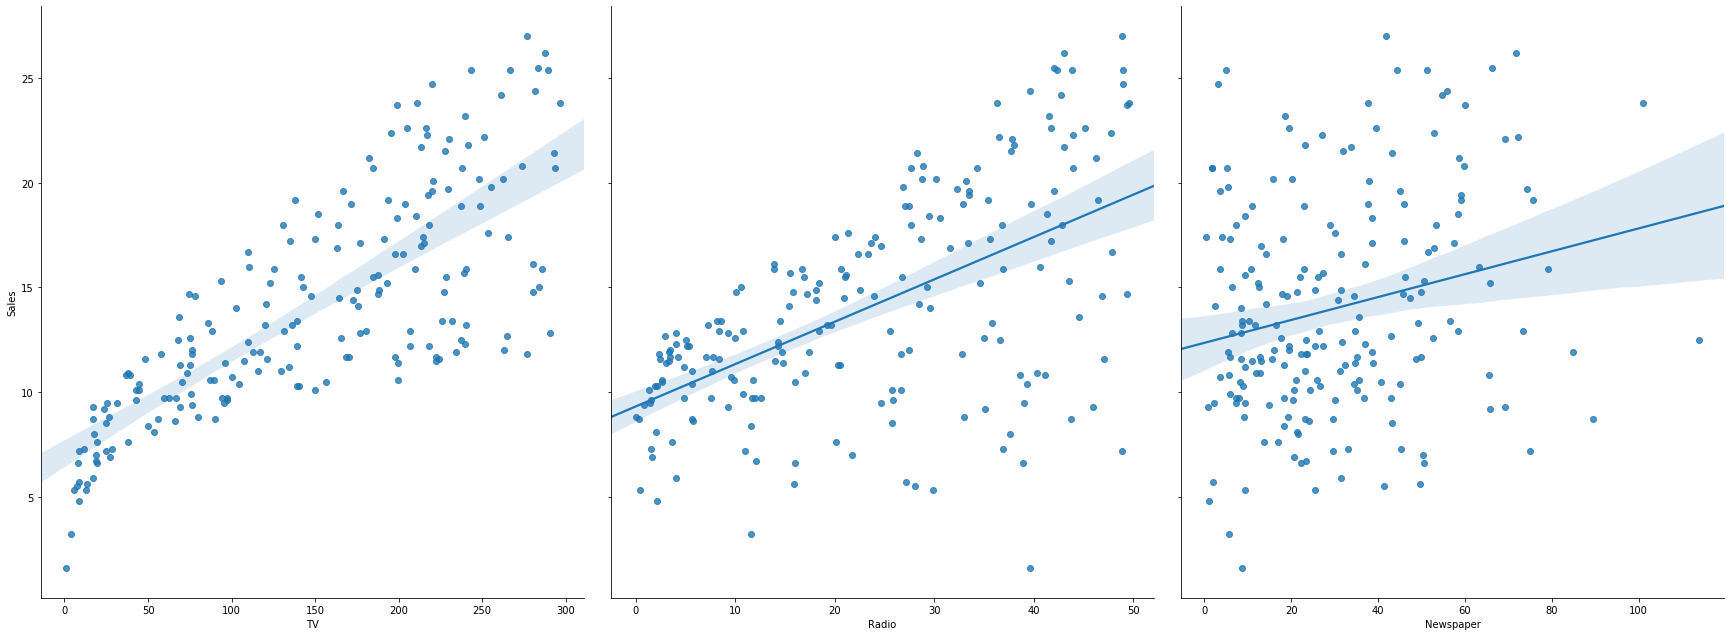

In [6]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=9, aspect=0.9, kind='reg')

## Preparing Data

In [8]:
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
y = data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [11]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Fitting the perfect line on the data

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now to see how our Regressor performed, we will make predictions on the ```X_test``` Data.

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

y_pred = lr.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

1.0668917082595215
1.9730456202283397


The coefficients represent that a unit increase in TV Sales results in 0.04 unit increase in the Total Sales. 

In [21]:
list(zip(['TV', 'Radio', 'Newspaper'], lr.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.1791581224508883),
 ('Newspaper', 0.0034504647111804065)]

Now to see how the data is distributed by passing a KNN regressor through the data.

In [23]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 5

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([21.28, 15.3 ,  9.5 , 14.16, 16.4 , 24.2 , 18.26, 14.6 ,  9.98,
       16.7 , 16.18, 11.14, 16.36, 16.2 , 15.24, 17.28, 12.56, 15.08,
        9.6 , 18.3 , 10.82, 10.84,  6.74, 11.1 , 11.36, 15.82, 10.32,
       19.28, 16.68, 15.16, 21.18, 17.76, 14.96, 12.74, 20.28, 15.82,
       12.38, 11.66, 20.2 ,  7.18,  6.78,  9.98,  6.78, 19.72,  6.9 ,
       13.28, 13.9 , 21.16, 20.66, 19.3 ])

Running the KNN through one column so the data just to see how much the TV column influences the Sales column.

In [34]:
import numpy as np

X_train_TV = np.array(X_train.TV).reshape(-1, 1)
X_test_TV = np.array(X_test.TV).reshape(-1, 1)

print(X_train_TV.shape, X_train_TV.shape)

(150, 1) (150, 1)


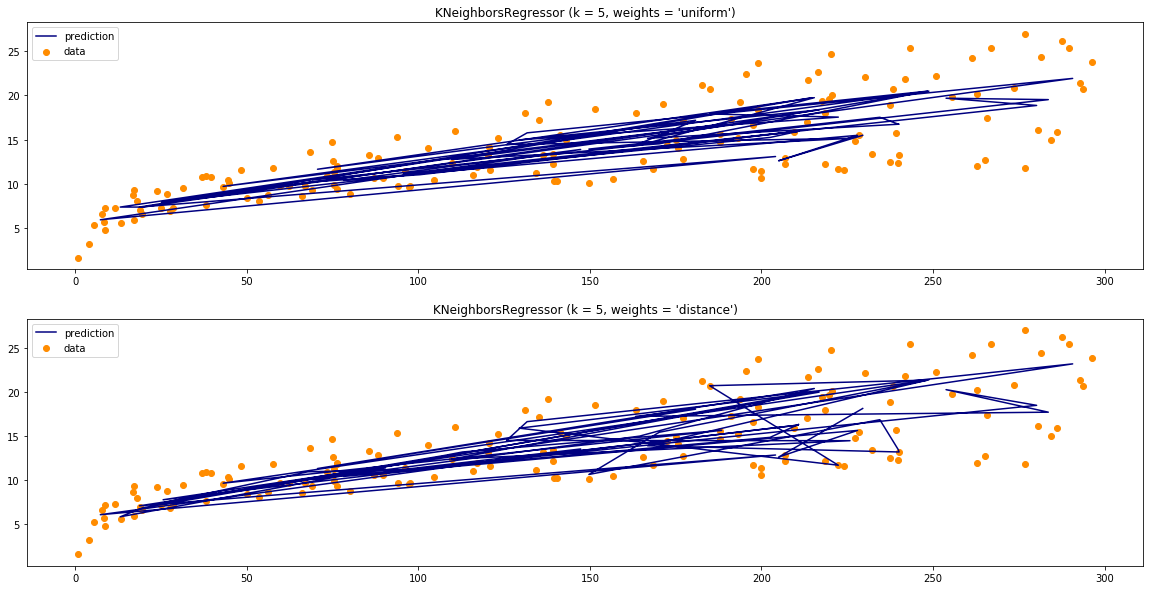

In [40]:
plt.rcParams["figure.figsize"] = (20,10)

for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_pred = knn.fit(X_train_TV, y_train).predict(X_test_TV)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train_TV, y_train, color='darkorange', label='data')
    plt.plot(X_test_TV, y_pred, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,weights))

Now seeing how each of the column contributes to the final target value - Sales.

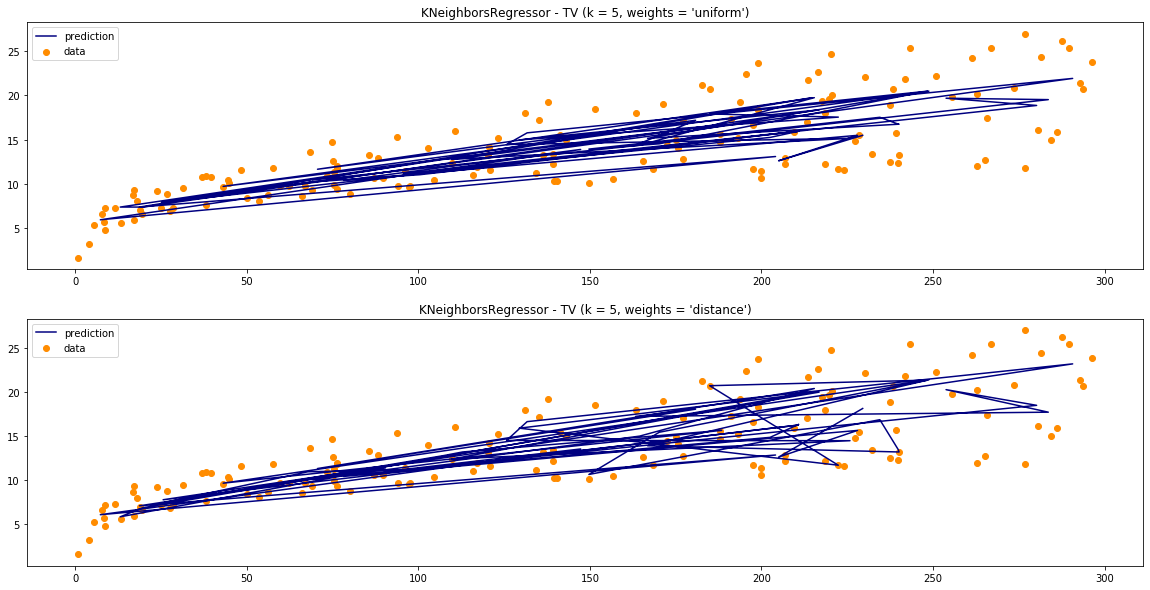

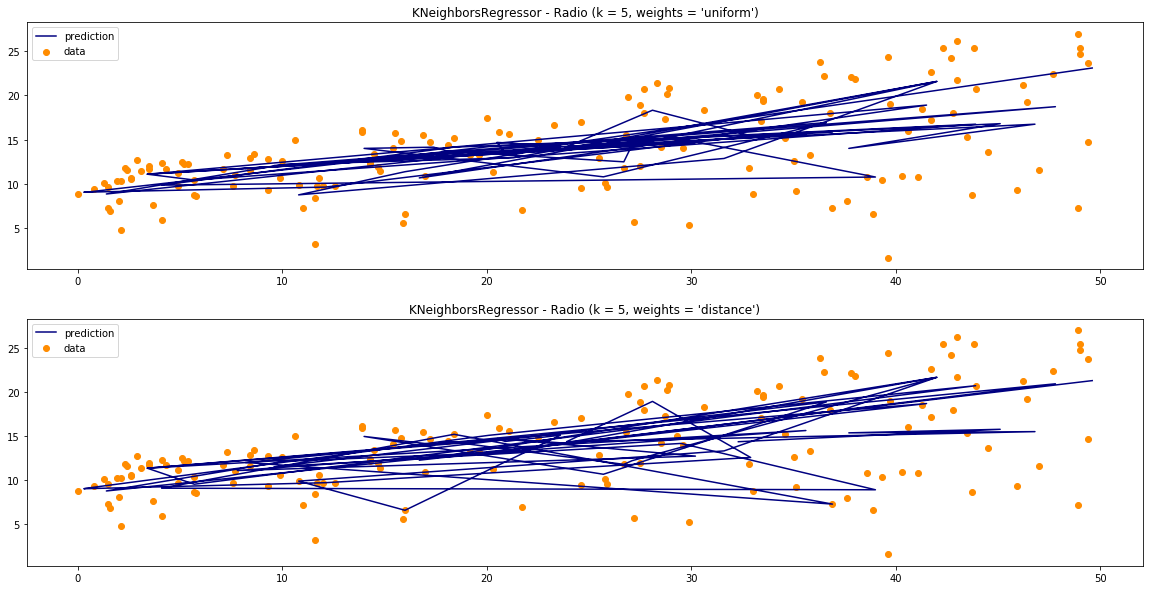

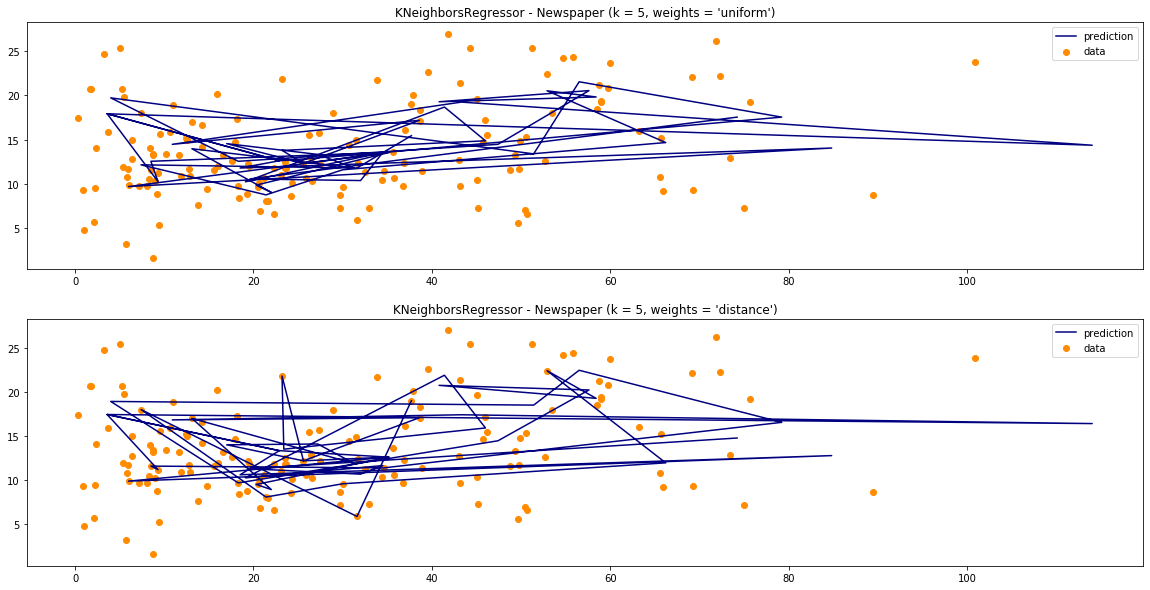

In [42]:
for column in X.columns:
    X_train_column = np.array(X_train[column]).reshape(-1, 1)
    X_test_column = np.array(X_test[column]).reshape(-1, 1)
    for i, weights in enumerate(['uniform', 'distance']):
        knn = KNeighborsRegressor(n_neighbors, weights=weights)
        y_pred = knn.fit(X_train_column, y_train).predict(X_test_column)

        plt.subplot(2, 1, i + 1)
        plt.scatter(X_train_column, y_train, color='darkorange', label='data')
        plt.plot(X_test_column, y_pred, color='navy', label='prediction')
        plt.axis('tight')
        plt.legend()
        plt.title("KNeighborsRegressor - %s (k = %i, weights = '%s')" % (column, n_neighbors, weights))
    plt.show()